## Milestone 1 submitted by Bindu Pillai

## Description Background & Context
- Human beings communicate with each other in the form of speech, gestures, and emotions. As
such, systems that can recognize the same are in great demand in many fields that aim to automate
these visual and audio cues to communication. With respect to artificial intelligence, a computer will
be able to interact with humans much more naturally if they are capable of understanding human
emotions. Such a system would also be of great help in counseling and other healthcare-related
fields.

- The scope of applications for automatic facial emotion recognition is endless. For example, In an
E-Learning system, the presentation style may even be varied depending on the student’s emotional
state.

- However, in many cases, static emotion detection alone is not very useful all by itself. It is essential
to be aware of the user’s feelings over a period of time in a live environment.

## Objective

- The objective of the problem statement is to detect the Facial Emotion (Happy or Not happy) of a
person.

## Data Dictionary

- This dataset contains 4446 48x48 grayscale images which are divided into two classes - Happy or
Not happy. 
- There is a zip folder containing the image dataset   























##Mounting the Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the Required libraries

In [21]:
import pandas as pd # MATRIX OPERATIONS
import numpy as np  # EFFICIENT DATA STRUCTURES
import os
from skimage import io
import matplotlib.pyplot as plt # GRAPHING AND VISUALIZATIONS
import math # MATHEMATICAL OPERATIONS
import cv2 # IMAGE PROCESSING - OPENCV
from glob import glob # FILE OPERATIONS
import itertools
import seaborn as sns
%matplotlib notebook
%matplotlib inline
import random
random.seed(45)
import warnings
warnings.filterwarnings("ignore")
# KERAS AND SKLEARN MODULES

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

from sklearn import metrics 

In [3]:
#Change the location of the folder accordingly
!unzip '/content/drive/My Drive/Capstone Project/Data/Dataset.zip'

Archive:  /content/drive/My Drive/Capstone Project/Data/Dataset.zip
   creating: Training/Test/
   creating: Training/Test/Happy/
 extracting: Training/Test/Happy/Training_33014365.jpg  
 extracting: Training/Test/Happy/Training_33021674.jpg  
 extracting: Training/Test/Happy/Training_33024240.jpg  
 extracting: Training/Test/Happy/Training_33235995.jpg  
 extracting: Training/Test/Happy/Training_33258993.jpg  
 extracting: Training/Test/Happy/Training_33275577.jpg  
 extracting: Training/Test/Happy/Training_33407137.jpg  
 extracting: Training/Test/Happy/Training_33423535.jpg  
 extracting: Training/Test/Happy/Training_33439996.jpg  
 extracting: Training/Test/Happy/Training_34644980.jpg  
 extracting: Training/Test/Happy/Training_34669152.jpg  
 extracting: Training/Test/Happy/Training_34683701.jpg  
 extracting: Training/Test/Happy/Training_34727870.jpg  
 extracting: Training/Test/Happy/Training_34738415.jpg  
 extracting: Training/Test/Happy/Training_35369640.jpg  
 extracting: Tr

In [22]:
classes=["Happy","Not_Happy"]
img_size=48
import imageio
def Create_data(directory):
  data=[]
  for category in classes:
    path=os.path.join(directory,category)
    class_num= classes.index(category)
    for img in os.listdir(path):
        img_array = imageio.imread(os.path.join(path,img),as_gray=True)
        new_array= cv2.resize(img_array,(img_size,img_size))
        # print(new_array.shape)
        data.append([new_array,class_num])
  return data

## **Converting image pixels into a CSV file**

In [23]:
import random
def pix_to_csv(directory):
  Data=Create_data(directory)
  random.shuffle(Data)
  img_size=48
  X=[]
  y=[]
  for features,labels in Data:
    X.append(features)
    y.append(labels)
  X=np.array(X).reshape(-1,img_size,img_size,1)
  Z=X.reshape(np.array(Data).shape[0],48*48*1)
  arr=pd.DataFrame(Z)
  H=pd.concat([pd.DataFrame(Z),pd.DataFrame(y,columns=['label'])],axis=1)
  return H

In [24]:
directory1="/content/Training/Train/"
directory2="/content/Training/Test/"

In [25]:
train_data=pix_to_csv(directory1)
test_data=pix_to_csv(directory2)

In [26]:
# Generating csv files from train and test data
train_data.to_csv("image_data_train.csv",index=False)
test_data.to_csv("image_data_test.csv",index=False)

In [27]:
directory= '/content/Training/Train'
classes=["Happy","Not_Happy"]

## Exploratory Data Analysis

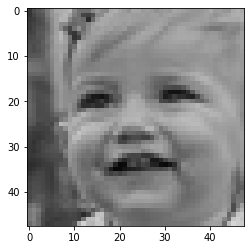

In [28]:
for category in classes:
  path= os.path.join(directory,category)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img))
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break

## Univariate Analysis - gaussian blur.

In [29]:
# Import necessary libraries.
import cv2
from google.colab.patches import cv2_imshow

Original Image:



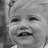


 Output after first gaussian blurring: 



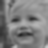


 Output after second gaussian blurring: 



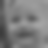

In [30]:
Gaussian1 = cv2.GaussianBlur(img_array, (5, 5), 0)
Gaussian2 = cv2.GaussianBlur(img_array, (15, 15), 0)
print('Original Image:\n')
cv2_imshow(img_array)
print('\n Output after first gaussian blurring: \n')
cv2_imshow(Gaussian1)
print('\n Output after second gaussian blurring: \n')
cv2_imshow(Gaussian2)